# 🌿 **July 9 [The only trustworthy notebook of week 4]**

### 🚨 Updates [Must read 😡]:

⚠️⚠️⚠️ **This notebook was modified on July 26 to correct BFS and DFS**

⚠️⚠️⚠️ **No need to read `July 12 notebook`**

### 📃 What's in this notebook [Complete week 4]:

👉 **Standard implementation of all algorithms.**

- BFS ✅
- DFS ✅
- DFS Recursive ✅
- Connected components ✅
- Pre and post numbering ✅
- Topological sort ✅
- Longest path (This implementation only calculates distances, for predecessor and path reconstruction see `PA notebook`) ✅

👉 **Guided walkthrough for all algorithms.**

👉 **Demo and visualizations.**

# Queue & Stack

In [1]:
class Queue:
  def __init__(self):
    self.data = []

  def is_empty(self):
    return len(self.data) == 0

  def enqueue(self, value):
    self.data.append(value)

  def dequeue(self):
    if self.is_empty():
      raise Exception('queue is empty')
    return self.data.pop(0)

  def __str__(self):
    return str(self.data)


queue = Queue()
queue.enqueue(10)
queue.enqueue(20)
queue.enqueue(30)

print(queue.dequeue())
print(queue.dequeue())
queue.enqueue(40)
print(queue.dequeue())
print(queue)

10
20
30
[40]


In [2]:
class Stack:
  def __init__(self):
    self.data = []

  def is_empty(self):
    return len(self.data) == 0

  def push(self, value):
    self.data.append(value)

  def pop(self):
    if self.is_empty():
      raise Exception('stack is empty')
    return self.data.pop()

  def __str__(self):
    return str(self.data)


stack = Stack()
stack.push(10)
stack.push(20)
stack.push(30)

print(stack.pop())
print(stack.pop())
stack.push(40)
print(stack.pop())
print(stack)

30
20
40
[10]


# BFS [Updated ✅]

**The difference between old (incorrect) code and new (correct) code:**

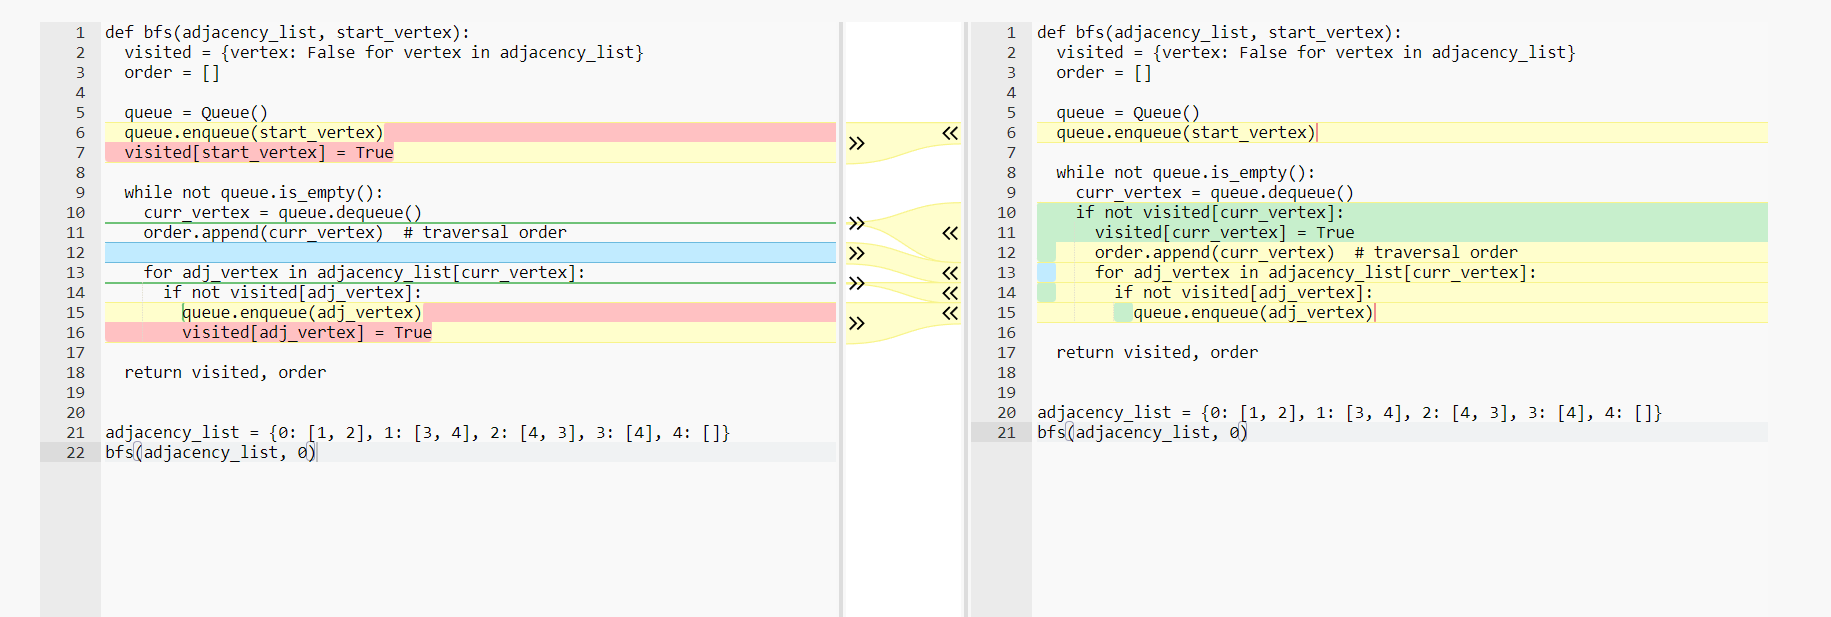

In [3]:
def bfs(adjacency_list, start_vertex):
  pass
  # initialize visited dict = {vertex: False for all vertices}

  # initialize the queue, enqueue the `start_vertex`

  # while queue is not empty:
  # a. `curr_vertex` <- queue.dequeue()
  # b. if `curr_vertex` is not visited:
  #    i. mark `curr_vertex` as visited
  #    ii. append `curr_vertex` to the order list (traversal order)
  #    iii. for all neighbors of `curr_vertex`:
  #         if neighbor is not visited, enqueue it to queue

  # return visited and order

In [4]:
def bfs(adjacency_list, start_vertex):
  visited = {vertex: False for vertex in adjacency_list}
  order = []

  queue = Queue()
  queue.enqueue(start_vertex)

  while not queue.is_empty():
    curr_vertex = queue.dequeue()
    if not visited[curr_vertex]:
      visited[curr_vertex] = True
      order.append(curr_vertex)  # traversal order

      for adj_vertex in adjacency_list[curr_vertex]:
        if not visited[adj_vertex]:
          queue.enqueue(adj_vertex)

  return visited, order


adjacency_list = {0: [1, 2], 1: [3, 4], 2: [4, 3], 3: [4], 4: []}
bfs(adjacency_list, 0)

({0: True, 1: True, 2: True, 3: True, 4: True}, [0, 1, 2, 3, 4])

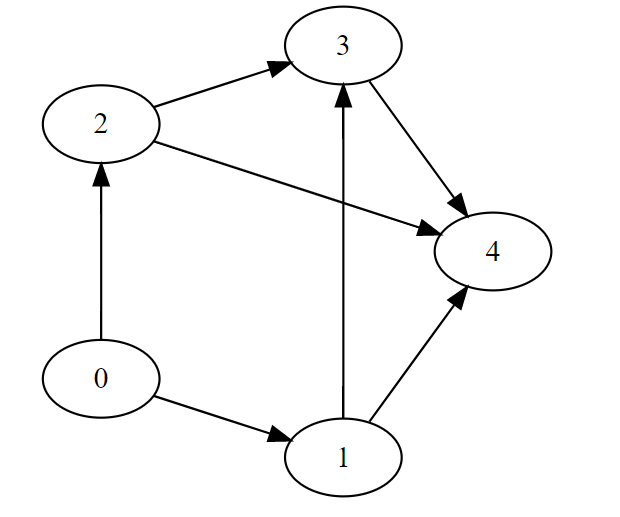

# Parent, level info (BFS)

In [5]:
def bfs(adjacency_list, start_vertex):
  visited = {vertex: False for vertex in adjacency_list}
  parent = {vertex: None for vertex in adjacency_list}  # NEW 😱
  level = {vertex: 0 for vertex in adjacency_list}  # NEW 😱
  order = []

  queue = Queue()
  queue.enqueue(start_vertex)

  while not queue.is_empty():
    curr_vertex = queue.dequeue()
    if not visited[curr_vertex]:
      visited[curr_vertex] = True
      order.append(curr_vertex)

      for adj_vertex in adjacency_list[curr_vertex]:
        if not visited[adj_vertex]:
          queue.enqueue(adj_vertex)

          if parent[adj_vertex] is None:
            parent[adj_vertex] = curr_vertex  # NEW 😱
            level[adj_vertex] = level[curr_vertex]+1  # NEW 😱

  return visited, order, parent, level


adjacency_list = {0: [1, 2], 1: [3, 4], 2: [4, 3], 3: [4], 4: []}
bfs(adjacency_list, 0)

({0: True, 1: True, 2: True, 3: True, 4: True},
 [0, 1, 2, 3, 4],
 {0: None, 1: 0, 2: 0, 3: 1, 4: 1},
 {0: 0, 1: 1, 2: 1, 3: 2, 4: 2})

# DFS [Updated ✅]

In [6]:
def dfs(adjacency_list, start_vertex):
  pass
  # initialize visited dict = {vertex: False for all vertices}

  # initialize the stack, push the `start_vertex`

  # while stack is not empty:
  # a. `curr_vertex` <- stack.pop()
  # b. if `curr_vertex` is not visited:
  #    i. mark `curr_vertex` as visited
  #    ii. append `curr_vertex` to the order list (traversal order)
  #    iii. for all neighbors of `curr_vertex`:
  #         if neighbor is not visited, push it to stack

  # return visited and order

In [7]:
def dfs(adjacency_list, start_vertex):
  visited = {vertex: False for vertex in adjacency_list}
  order = []

  stack = Stack()
  stack.push(start_vertex)

  while not stack.is_empty():
    curr_vertex = stack.pop()
    if not visited[curr_vertex]:
      visited[curr_vertex] = True
      order.append(curr_vertex)  # traversal order

      for adj_vertex in adjacency_list[curr_vertex]:
        if not visited[adj_vertex]:
          stack.push(adj_vertex)

  return visited, order


adjacency_list = {0: [1, 2], 1: [3, 4], 2: [4, 3], 3: [4], 4: []}
dfs(adjacency_list, 0)

({0: True, 1: True, 2: True, 3: True, 4: True}, [0, 2, 3, 4, 1])

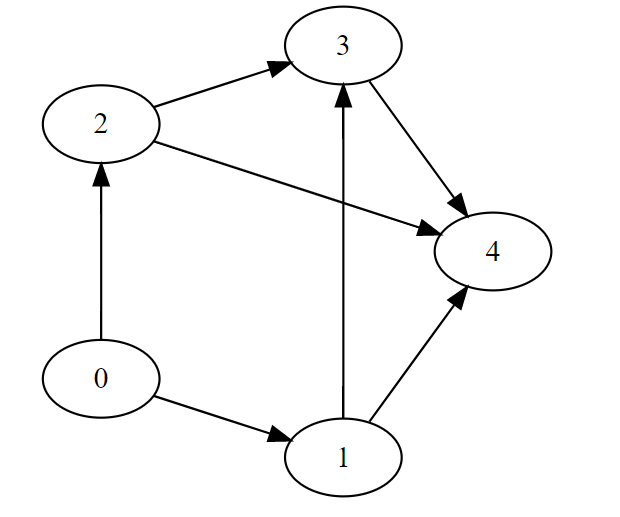

# DFS recursive

In [8]:
def dfs_recursive(adjacency_list, curr_vertex, visited=None, order=None):
  pass
  # if visited is none, initialize visited and order
  # mark `curr_vertex` as visited
  # append `curr_vertex` to order

  # for all neighbors of `curr_vertex`:
  #   if neighbor is not visited, call dfs_recursive on neighbor

  # return visited and order

In [9]:
def dfs_recursive(adjacency_list, curr_vertex, visited=None, order=None):
  if visited is None:
    visited = {vertex: False for vertex in adjacency_list}
    order = []

  visited[curr_vertex] = True
  order.append(curr_vertex)  # traversal order

  for adj_vertex in adjacency_list[curr_vertex]:
    if not visited[adj_vertex]:
      dfs_recursive(adjacency_list, adj_vertex, visited, order)

  return visited, order


adjacency_list = {0: [1, 2], 1: [3, 4], 2: [4, 3], 3: [4], 4: []}
dfs_recursive(adjacency_list, 0)

({0: True, 1: True, 2: True, 3: True, 4: True}, [0, 1, 3, 4, 2])

In [10]:
adjacency_list = {0: [1, 2], 1: [3, 4], 2: [4, 3], 3: [4], 4: []}
dfs_recursive(adjacency_list, 0)

# call dfs_recursive(adjacency_list, 0)
# 0 -> visited
#
#         call dfs_recursive(adjacency_list, 1)
#         1 -> visited
#
#                 call dfs_recursive(adjacency_list, 3)
#                 3 -> visited
#
#                         call dfs_recursive(adjacency_list, 4)
#                         4 -> visited
#
#         return to call dfs_recursive(adjacency_list, 1)
#
#                 call dfs_recursive(adjacency_list, 4)
#                 skipped (already visited)
#
# return to call dfs_recursive(adjacency_list, 0)
#
#         call dfs_recursive(adjacency_list, 2)
#         2 -> visited
#
#                 call dfs_recursive(adjacency_list, 4)
#                 skipped (already visited)
#
#                 call dfs_recursive(adjacency_list, 3)
#                 skipped (already visited)
#
# return to call dfs_recursive(adjacency_list, 0)
#
# 🏁 finish
# 👉 dfs traversal order = [0, 1, 3, 4, 2]

({0: True, 1: True, 2: True, 3: True, 4: True}, [0, 1, 3, 4, 2])

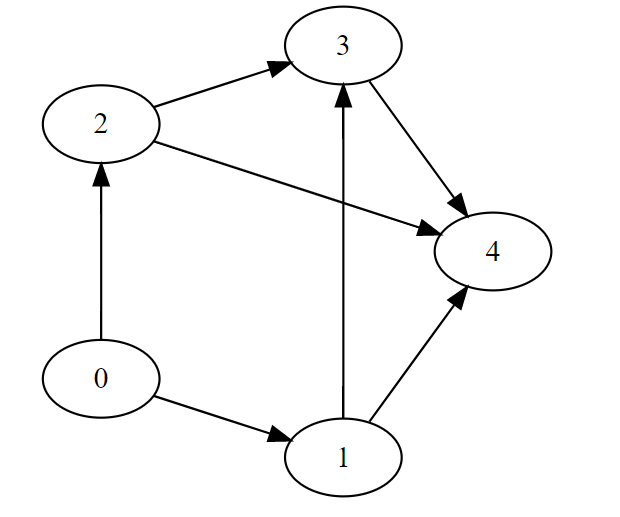

In [11]:
adjacency_list = {
    1: [2, 3, 7],
    2: [4, 7],
    3: [5, 7],
    4: [6],
    5: [6],
    7: [6],
    6: []
}
dfs_recursive(adjacency_list, 1)

({1: True, 2: True, 3: True, 4: True, 5: True, 7: True, 6: True},
 [1, 2, 4, 6, 7, 3, 5])

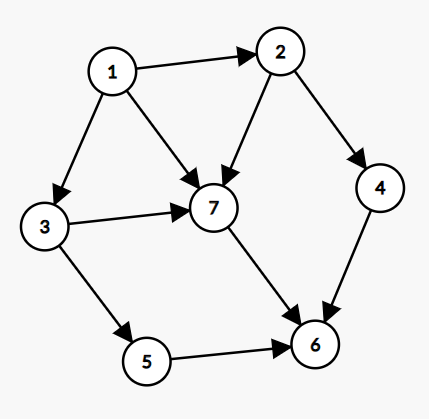

# DFS vs DFS recursive vs BFS

In [12]:
adjacency_list = {0: [1, 2], 1: [3, 4], 2: [4, 3], 3: [4], 4: []}
dfs(adjacency_list, 0)
dfs_recursive(adjacency_list, 0)
bfs(adjacency_list, 0)

({0: True, 1: True, 2: True, 3: True, 4: True}, [0, 2, 3, 4, 1])

({0: True, 1: True, 2: True, 3: True, 4: True}, [0, 1, 3, 4, 2])

({0: True, 1: True, 2: True, 3: True, 4: True},
 [0, 1, 2, 3, 4],
 {0: None, 1: 0, 2: 0, 3: 1, 4: 1},
 {0: 0, 1: 1, 2: 1, 3: 2, 4: 2})

# Parent, level info (DFS recursive)

In [13]:
def dfs_recursive(adjacency_list, curr_vertex, visited=None, order=None, parent=None, level=None):
  if visited is None:
    visited = {vertex: False for vertex in adjacency_list}
    parent = {vertex: None for vertex in adjacency_list}  # NEW 😱
    level = {vertex: 0 for vertex in adjacency_list}  # NEW 😱
    order = []

  visited[curr_vertex] = True
  order.append(curr_vertex)

  for adj_vertex in adjacency_list[curr_vertex]:
    if not visited[adj_vertex]:
      if parent[adj_vertex] is None:
        parent[adj_vertex] = curr_vertex  # NEW 😱
        level[adj_vertex] = level[curr_vertex]+1  # NEW 😱
      dfs_recursive(adjacency_list, adj_vertex, visited, order, parent, level)
  return visited, order, parent, level


adjacency_list = {0: [1, 2], 1: [3, 4], 2: [4, 3], 3: [4], 4: []}
dfs_recursive(adjacency_list, 0)

({0: True, 1: True, 2: True, 3: True, 4: True},
 [0, 1, 3, 4, 2],
 {0: None, 1: 0, 2: 0, 3: 1, 4: 3},
 {0: 0, 1: 1, 2: 1, 3: 2, 4: 3})

# Find Connected Components in graph using BFS

In [14]:
def bfs(adjacency_list, start_vertex, visited):
  pass
  # initialize queue and enqueue `start_vertex`
  # initialize component list

  # while queue is not empty:
  #   `curr_vertex` <- queue.dequeue()
  #   if `curr_vertex` is not visited:
  #     mark `curr_vertex` as visited
  #     add `curr_vertex` to component
  #     for all neighbors of `curr_vertex`:
  #       if neighbor is not visited, enqueue it

  # return component


def find_connected_components(adjacency_list):
  pass
  # initialize visited dict = {vertex: false for all vertices}
  # initialize components list

  # for each vertex in adjacency_list:
  #   if vertex is not visited, call bfs and append result to components

  # return components

In [15]:
def bfs(adjacency_list, start_vertex, visited):
  queue = Queue()
  queue.enqueue(start_vertex)
  component = []

  while not queue.is_empty():
    curr_vertex = queue.dequeue()
    if not visited[curr_vertex]:
      visited[curr_vertex] = True
      component.append(curr_vertex)

      for adj_vertex in adjacency_list[curr_vertex]:
        if not visited[adj_vertex]:
          queue.enqueue(adj_vertex)
  return component


def find_connected_components(adjacency_list):
  visited = {vertex: False for vertex in adjacency_list}
  components = []

  for vertex in adjacency_list:
    if not visited[vertex]:
      component = bfs(adjacency_list, vertex, visited)
      components.append(component)
  return components


adjacency_list = {
    'A': ['B'],
    'B': ['C', 'D'],
    'C': ['A'],
    'D': [],
    'E': ['F'],
    'F': [],
}

find_connected_components(adjacency_list)

[['A', 'B', 'C', 'D'], ['E', 'F']]

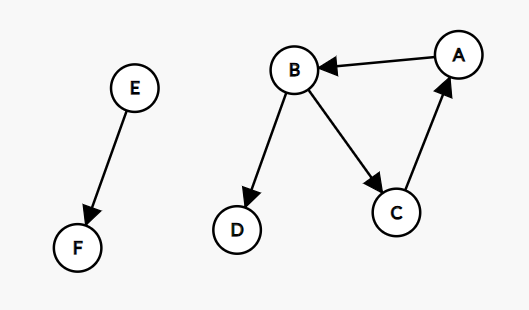

# Pre and Post Numbering Using DFS

In [16]:
def dfs(adjacency_list, curr_vertex, visited, pre, post, counter):
  pass
  # mark curr_vertex as visited

  # set pre[curr_vertex] to counter value, increment counter

  # for each neighbor of curr_vertex:
  #   if neighbor is not visited, call dfs on neighbor

  # set post[curr_vertex] to counter value, increment counter


def pre_post_numbering(adjacency_list):
  pass
  # initialize visited, pre, post dictionaries, and counter

  # for each vertex in adjacency_list:
  #   if vertex is not visited, call dfs

  # return pre and post dictionaries

In [17]:
def dfs(adjacency_list, curr_vertex, visited, pre, post, counter):
  visited[curr_vertex] = True

  pre[curr_vertex] = counter[0]  # dfs visits the `curr_vertex`
  counter[0] += 1

  # dfs visits the neighbors of `curr_vertex`
  for adj_vertex in adjacency_list[curr_vertex]:
    if not visited[adj_vertex]:
      dfs(adjacency_list, adj_vertex, visited, pre, post, counter)

  post[curr_vertex] = counter[0]  # dfs leaves the `curr_vertex`
  counter[0] += 1


def pre_post_numbering(adjacency_list):
  visited = {vertex: False for vertex in adjacency_list}
  pre = {vertex: -1 for vertex in adjacency_list}
  post = {vertex: -1 for vertex in adjacency_list}
  counter = [0]

  for vertex in adjacency_list:
    if not visited[vertex]:
      dfs(adjacency_list, vertex, visited, pre, post, counter)

  return pre, post


adjacency_list = {
    0: [1, 2],
    1: [3, 4],
    2: [],
    3: [],
    4: [],
    5: []
}

#     0
#    / \
#   1   2   5
#  / \
# 3   4

pre, post = pre_post_numbering(adjacency_list)
for vertex in adjacency_list:
  print(f'{vertex}: ({pre[vertex]}, {post[vertex]})')

# visit 0 (0, -1)
#         visit 1 (1, -1)
#                 visit 3 (2, -1)
#                 leave 3 (2, 3)
#
#                 visit 4 (4, -1)
#                 leave 4 (4, 5)
#         leave 1 (1, 6)
#
#         visit 2 (7, -1)
#         leave 2 (7, 8)
# leave 0 (0, 9)
#
# visit 5 (10, -1)
# leave 5 (10, 11)

0: (0, 9)
1: (1, 6)
2: (7, 8)
3: (2, 3)
4: (4, 5)
5: (10, 11)


# DAG Topological Sort

In [18]:
def dfs(adjacency_list, curr_vertex, visited, stack):
  pass
  # mark curr_vertex as visited

  # for each neighbor of curr_vertex:
  #   if neighbor is not visited, call dfs on neighbor

  # append curr_vertex to stack


def topological_sort(adjacency_list):
  pass
  # initialize visited dictionary and stack

  # for each vertex in adjacency_list:
  #   if vertex is not visited, call dfs

  # return stack in reverse order

In [19]:
def dfs(adjacency_list, curr_vertex, visited, stack):
  visited[curr_vertex] = True

  for neighbor in adjacency_list[curr_vertex]:
    if not visited[neighbor]:
      dfs(adjacency_list, neighbor, visited, stack)

  stack.append(curr_vertex)


def topological_sort(adjacency_list):
  visited = {vertex: False for vertex in adjacency_list}
  stack = []

  for vertex in adjacency_list:
    if not visited[vertex]:
      dfs(adjacency_list, vertex, visited, stack)

  # the stack contains the topologically sorted order in reverse
  return stack[::-1]


adjacency_list = {
    0: [1, 2],
    1: [3, 4],
    2: [],
    3: [],
    4: [],
    5: []
}

#     0
#    / \
#   1   2   5
#  / \
# 3   4

topological_sort(adjacency_list)

[5, 0, 2, 1, 4, 3]

In [20]:
adjacency_list = {
    1: [2, 3, 7],
    2: [4, 7],
    3: [5, 7],
    4: [6],
    5: [6],
    7: [6],
    6: []
}
topological_sort(adjacency_list)

[1, 3, 5, 2, 7, 4, 6]

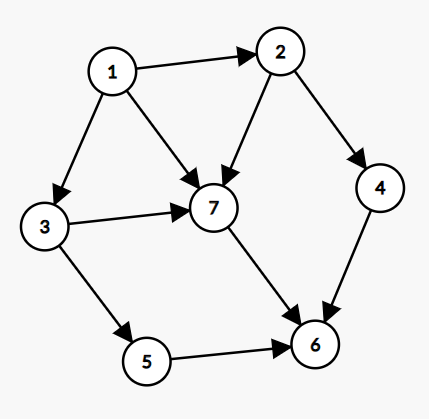

# DAG Longest path

In [21]:
def longest_path(adjacency_list, start_vertex):
  pass
  # get topological order of vertices

  # initialize distances dictionary with -1 for all vertices, set distances[start_vertex] to 0

  # for each vertex in topological_order:
  #   if vertex is reachable (distances[vertex] != -1):
  #     for each neighbor of vertex:
  #       update distances[neighbor] with max of current value or distances[vertex] + 1

  # return the distances
  # OR
  # return the maximum value in distances

In [22]:
def longest_path(adjacency_list, start_vertex):
  # compute topological order
  topological_order = topological_sort(adjacency_list)

  # initialize distances
  distances = {vertex: -1 for vertex in adjacency_list}
  distances[start_vertex] = 0

  # compute distances
  for parent in topological_order:
    if distances[parent] != -1:  # if parent has a distance assigned
      for child in adjacency_list[parent]:
        new_distance = distances[parent] + 1
        if new_distance > distances[child]:
          distances[child] = new_distance

  return distances
  # return max(distances.values())


adjacency_list = {
    0: [1, 2],
    1: [3, 4],
    2: [],
    3: [],
    4: [],
    5: []
}

#     0
#    / \
#   1   2   5
#  / \
# 3   4

longest_path(adjacency_list, 0)

{0: 0, 1: 1, 2: 1, 3: 2, 4: 2, 5: -1}

In [23]:
adjacency_list = {
    1: [2, 3, 7],
    2: [4, 7],
    3: [5, 7],
    4: [6],
    5: [6],
    7: [6],
    6: []
}
longest_path(adjacency_list, 1)

{1: 0, 2: 1, 3: 1, 4: 2, 5: 2, 7: 2, 6: 3}

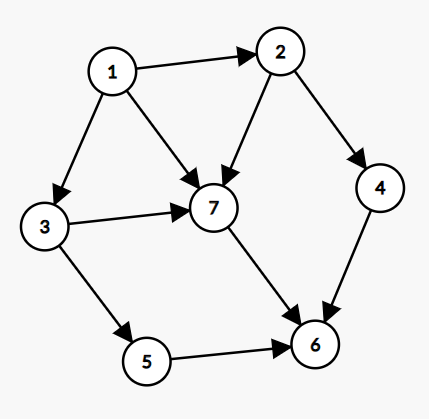